In [94]:
import zipfile

zip_ref = zipfile.ZipFile("pizza_steak.zip","r")
zip_ref.extractall()
zip_ref.close()

In [95]:
!ls pizza_steak/

test  train


In [96]:
!ls pizza_steak/train

pizza  steak


In [97]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [98]:
import os

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.")

There are 2 directories and 0 images in pizza_steak.
There are 2 directories and 0 images in pizza_steak/train.
There are 0 directories and 750 images in pizza_steak/train/steak.
There are 0 directories and 750 images in pizza_steak/train/pizza.
There are 2 directories and 0 images in pizza_steak/test.
There are 0 directories and 250 images in pizza_steak/test/steak.
There are 0 directories and 250 images in pizza_steak/test/pizza.


In [99]:
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

In [100]:
import pathlib
import numpy as np
import pandas as pd

data_dir = pathlib.Path("pizza_steak/train/")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


In [101]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class
  print(target_folder)
  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image)
  img = mpimg.imread(target_folder + "/" + random_image[0])
  # print(img)
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')
  print(f"Image shape: {img.shape}")
  return img

pizza_steak/train/steak
['947877.jpg']
Image shape: (512, 512, 3)


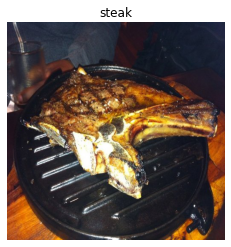

In [102]:
img= view_random_image(target_dir="pizza_steak/train/",
                       target_class="steak")

In [103]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 40,  42,  63],
        [ 39,  41,  62],
        [ 36,  41,  61],
        ...,
        [ 32,  40,  61],
        [ 32,  40,  61],
        [ 34,  42,  63]],

       [[ 40,  42,  63],
        [ 38,  40,  61],
        [ 35,  40,  60],
        ...,
        [ 32,  40,  61],
        [ 32,  40,  61],
        [ 33,  41,  62]],

       [[ 43,  45,  66],
        [ 41,  43,  64],
        [ 39,  41,  62],
        ...,
        [ 32,  40,  61],
        [ 32,  40,  61],
        [ 33,  41,  62]],

       ...,

       [[168,  78,  44],
        [163,  73,  39],
        [158,  68,  33],
        ...,
        [ 56,  29,  34],
        [ 55,  28,  33],
        [ 54,  27,  32]],

       [[166,  77,  47],
        [163,  74,  42],
        [159,  70,  38],
        ...,
        [ 58,  31,  36],
        [ 57,  30,  35],
        [ 56,  29,  34]],

       [[157,  70,  42],
        [160,  71,  41],
        [160,  71,  41],
        ...,
        [ 55,  28,  3

In [104]:
img/255

array([[[0.15686275, 0.16470588, 0.24705882],
        [0.15294118, 0.16078431, 0.24313725],
        [0.14117647, 0.16078431, 0.23921569],
        ...,
        [0.1254902 , 0.15686275, 0.23921569],
        [0.1254902 , 0.15686275, 0.23921569],
        [0.13333333, 0.16470588, 0.24705882]],

       [[0.15686275, 0.16470588, 0.24705882],
        [0.14901961, 0.15686275, 0.23921569],
        [0.1372549 , 0.15686275, 0.23529412],
        ...,
        [0.1254902 , 0.15686275, 0.23921569],
        [0.1254902 , 0.15686275, 0.23921569],
        [0.12941176, 0.16078431, 0.24313725]],

       [[0.16862745, 0.17647059, 0.25882353],
        [0.16078431, 0.16862745, 0.25098039],
        [0.15294118, 0.16078431, 0.24313725],
        ...,
        [0.1254902 , 0.15686275, 0.23921569],
        [0.1254902 , 0.15686275, 0.23921569],
        [0.12941176, 0.16078431, 0.24313725]],

       ...,

       [[0.65882353, 0.30588235, 0.17254902],
        [0.63921569, 0.28627451, 0.15294118],
        [0.61960784, 0

In [105]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [106]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_1.compile(loss='binary_crossentropy',
                optimizer= 'adam',
                metrics= ['accuracy'])

history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 12s 224ms/step - loss: 0.5834 - accuracy: 0.6733 - val_loss: 0.4383 - val_accuracy: 0.7780
Epoch 2/5
47/47 [==============================] - 10s 217ms/step - loss: 0.4175 - accuracy: 0.8100 - val_loss: 0.3770 - val_accuracy: 0.8100
Epoch 3/5
47/47 [==============================] - 10s 219ms/step - loss: 0.3847 - accuracy: 0.8340 - val_loss: 0.3232 - val_accuracy: 0.8680
Epoch 4/5
47/47 [==============================] - 9s 196ms/step - loss: 0.3726 - accuracy: 0.8513 - val_loss: 0.3393 - val_accuracy: 0.8620
Epoch 5/5
47/47 [==============================] - 10s 218ms/step - loss: 0.3125 - accuracy: 0.8620 - val_loss: 0.3039 - val_accuracy: 0.8620


In [107]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

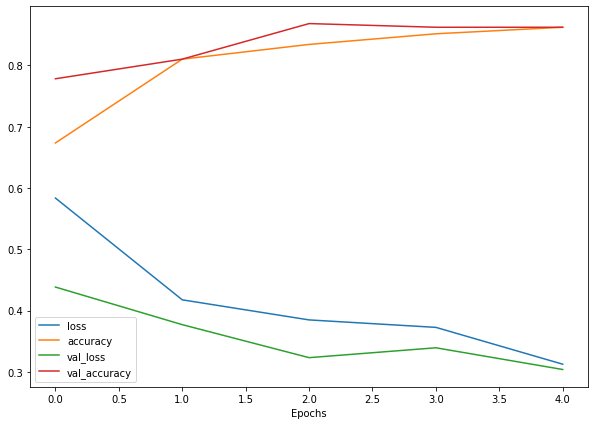

In [108]:
pd.DataFrame(history_1.history).plot(xlabel='Epochs',figsize=(10, 7))

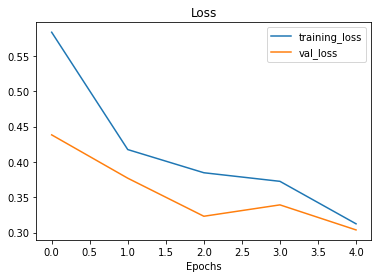

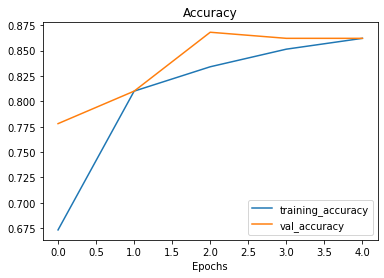

In [109]:
plot_loss_curves(history_1)

In [110]:
len(train_data)

47

In [111]:
1500/32

46.875

In [112]:
len(valid_data)

16

In [113]:
model_1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_16 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_17 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_18 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                 

In [114]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen_augmented= ImageDataGenerator(rescale=1/255.,
                                            rotation_range=20,
                                            shear_range=0.2,
                                            zoom_range=0.2,
                                            width_shift_range=0.2,
                                            height_shift_range=0.2,
                                            horizontal_flip=True)

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [115]:
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) 


print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False)

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


In [116]:
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

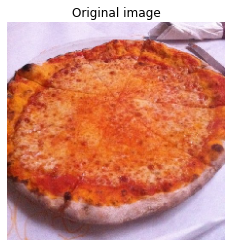

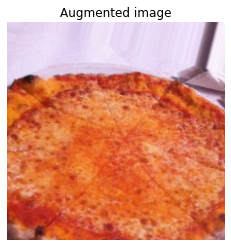

In [117]:
random_number = random.randint(0, 32)
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

In [118]:
model_2 =Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model_2.compile(loss= 'binary_crossentropy',
                optimizer= Adam(),
                metrics=['accuracy'])

history_2 = model_2.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 499ms/step - loss: 0.7310 - accuracy: 0.5207 - val_loss: 0.6835 - val_accuracy: 0.5220
Epoch 2/5
47/47 [==============================] - 24s 513ms/step - loss: 0.7036 - accuracy: 0.5027 - val_loss: 0.6751 - val_accuracy: 0.7140
Epoch 3/5
47/47 [==============================] - 24s 520ms/step - loss: 0.6815 - accuracy: 0.6007 - val_loss: 0.6514 - val_accuracy: 0.7320
Epoch 4/5
47/47 [==============================] - 24s 517ms/step - loss: 0.6786 - accuracy: 0.6473 - val_loss: 0.6136 - val_accuracy: 0.7600
Epoch 5/5
47/47 [==============================] - 24s 513ms/step - loss: 0.7301 - accuracy: 0.6860 - val_loss: 0.6327 - val_accuracy: 0.5880


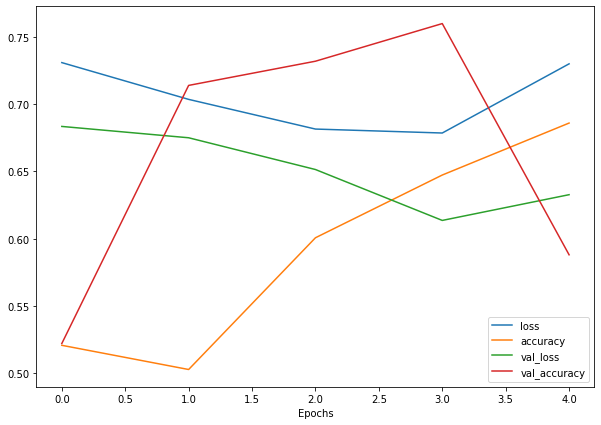

In [119]:
pd.DataFrame(history_2.history).plot(xlabel='Epochs',figsize=(10, 7))

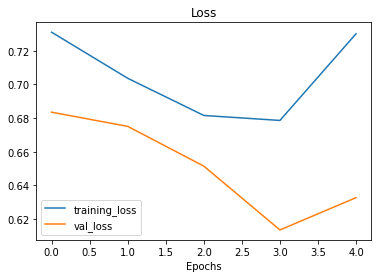

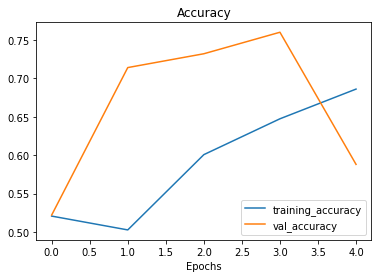

In [120]:
plot_loss_curves(history_2)

In [121]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True) # Shuffle data

Found 1500 images belonging to 2 classes.


In [122]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [123]:
model_3 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224,224,3)),
    MaxPool2D(2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model_3.compile(loss= 'binary_crossentropy',
                optimizer= Adam(),
                metrics=['accuracy'])

history_3= model_3.fit(train_data_augmented,
            epochs=5,
            steps_per_epoch=len(train_data_augmented_shuffled),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 507ms/step - loss: 0.6984 - accuracy: 0.5240 - val_loss: 0.6730 - val_accuracy: 0.8000
Epoch 2/5
47/47 [==============================] - 24s 516ms/step - loss: 0.6749 - accuracy: 0.5813 - val_loss: 0.5870 - val_accuracy: 0.7420
Epoch 3/5
47/47 [==============================] - 24s 517ms/step - loss: 0.6495 - accuracy: 0.6300 - val_loss: 0.4892 - val_accuracy: 0.8340
Epoch 4/5
47/47 [==============================] - 24s 513ms/step - loss: 0.6453 - accuracy: 0.6593 - val_loss: 0.5156 - val_accuracy: 0.7760
Epoch 5/5
47/47 [==============================] - 24s 521ms/step - loss: 0.5577 - accuracy: 0.7180 - val_loss: 0.3948 - val_accuracy: 0.8440


In [124]:
model_3.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 26, 26, 10)     

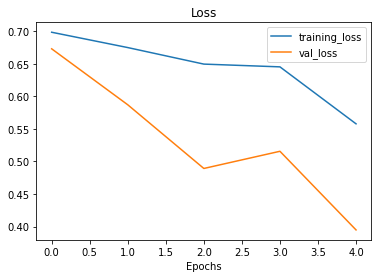

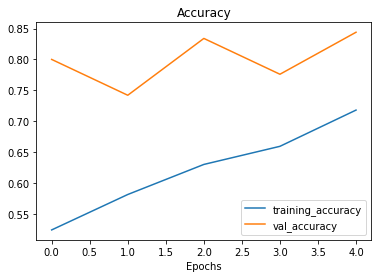

In [125]:
plot_loss_curves(history_3)

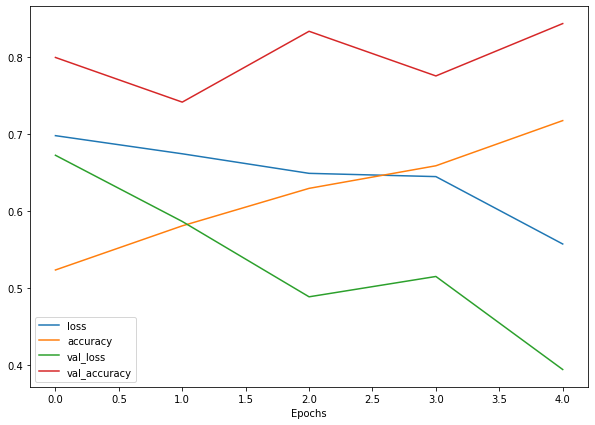

In [126]:
pd.DataFrame(history_3.history).plot(xlabel='Epochs',figsize=(10, 7))

pizza_steak/train/steak
['628628.jpg']
Image shape: (512, 512, 3)
pizza_steak/train/pizza
['1173913.jpg']
Image shape: (512, 512, 3)


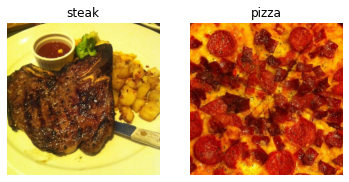

In [127]:
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")
     

In [128]:
images, labels = train_data.next() 
len(images), len(labels)

(32, 32)

In [129]:
images[:2], images[0].shape

(array([[[[0.427451  , 0.227451  , 0.3019608 ],
          [0.42352945, 0.21176472, 0.30588236],
          [0.43529415, 0.21568629, 0.32156864],
          ...,
          [0.23529413, 0.24313727, 0.2901961 ],
          [0.227451  , 0.24313727, 0.28627452],
          [0.21176472, 0.23529413, 0.28235295]],
 
         [[0.42352945, 0.22352943, 0.2901961 ],
          [0.4431373 , 0.23137257, 0.32156864],
          [0.43921572, 0.21960786, 0.3254902 ],
          ...,
          [0.25882354, 0.25882354, 0.30588236],
          [0.2509804 , 0.25882354, 0.30588236],
          [0.2392157 , 0.25490198, 0.3019608 ]],
 
         [[0.44705886, 0.24705884, 0.3137255 ],
          [0.43137258, 0.227451  , 0.3137255 ],
          [0.42352945, 0.20392159, 0.3019608 ],
          ...,
          [0.2627451 , 0.2627451 , 0.30980393],
          [0.25882354, 0.26666668, 0.3137255 ],
          [0.2509804 , 0.25882354, 0.30588236]],
 
         ...,
 
         [[0.36862746, 0.18431373, 0.22352943],
          [0.36862

In [130]:
labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)